In [1]:
%store -r df_cleaned


In [18]:
# Data manipulation 
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df_cleaned

,Close
Date,
2018-08-02,23.120001
2018-08-03,23.230000
2018-08-06,23.240000
2018-08-07,23.290001
2018-08-08,23.290001
...,...
2023-07-26,23.240000
2023-07-27,23.120001
2023-07-28,23.219999


In [20]:
type(df_cleaned)

pandas.core.frame.DataFrame

In [21]:
df_cleaned.index

DatetimeIndex(['2018-08-02', '2018-08-03', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-13',
               '2018-08-14', '2018-08-15',
               ...
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24',
               '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [22]:
# Create close_ts, close column with datetime
close_ts = df_cleaned['Close']
close_ts

Date
2018-08-02    23.120001
2018-08-03    23.230000
2018-08-06    23.240000
2018-08-07    23.290001
2018-08-08    23.290001
                ...    
2023-07-26    23.240000
2023-07-27    23.120001
2023-07-28    23.219999
2023-07-31    23.250000
2023-08-01    23.150000
Name: Close, Length: 1257, dtype: float64

In [23]:
# Check p value of our close_ts and check if it is stationary

# 1. Test Statistic, 
# 2. p-value, 
# 3. #Lags Used,
# 4. Number of Observations Used
# 5. Critical values
# Check the train 1st differencing stationary
dftest = adfuller(close_ts, autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

if dftest[1] < 0.05:
    print("Data is stationary.")
else:
    print("Data is \
NOT stationary.")

1. ADF         :  -2.365286390202761
2. P-Value     :  0.1517746664351109
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1247
5. Critical Values :
	 1% :  -3.4356048614183443
	 5% :  -2.8638605461891617
	 10% :  -2.5680054872544145
Data is NOT stationary.


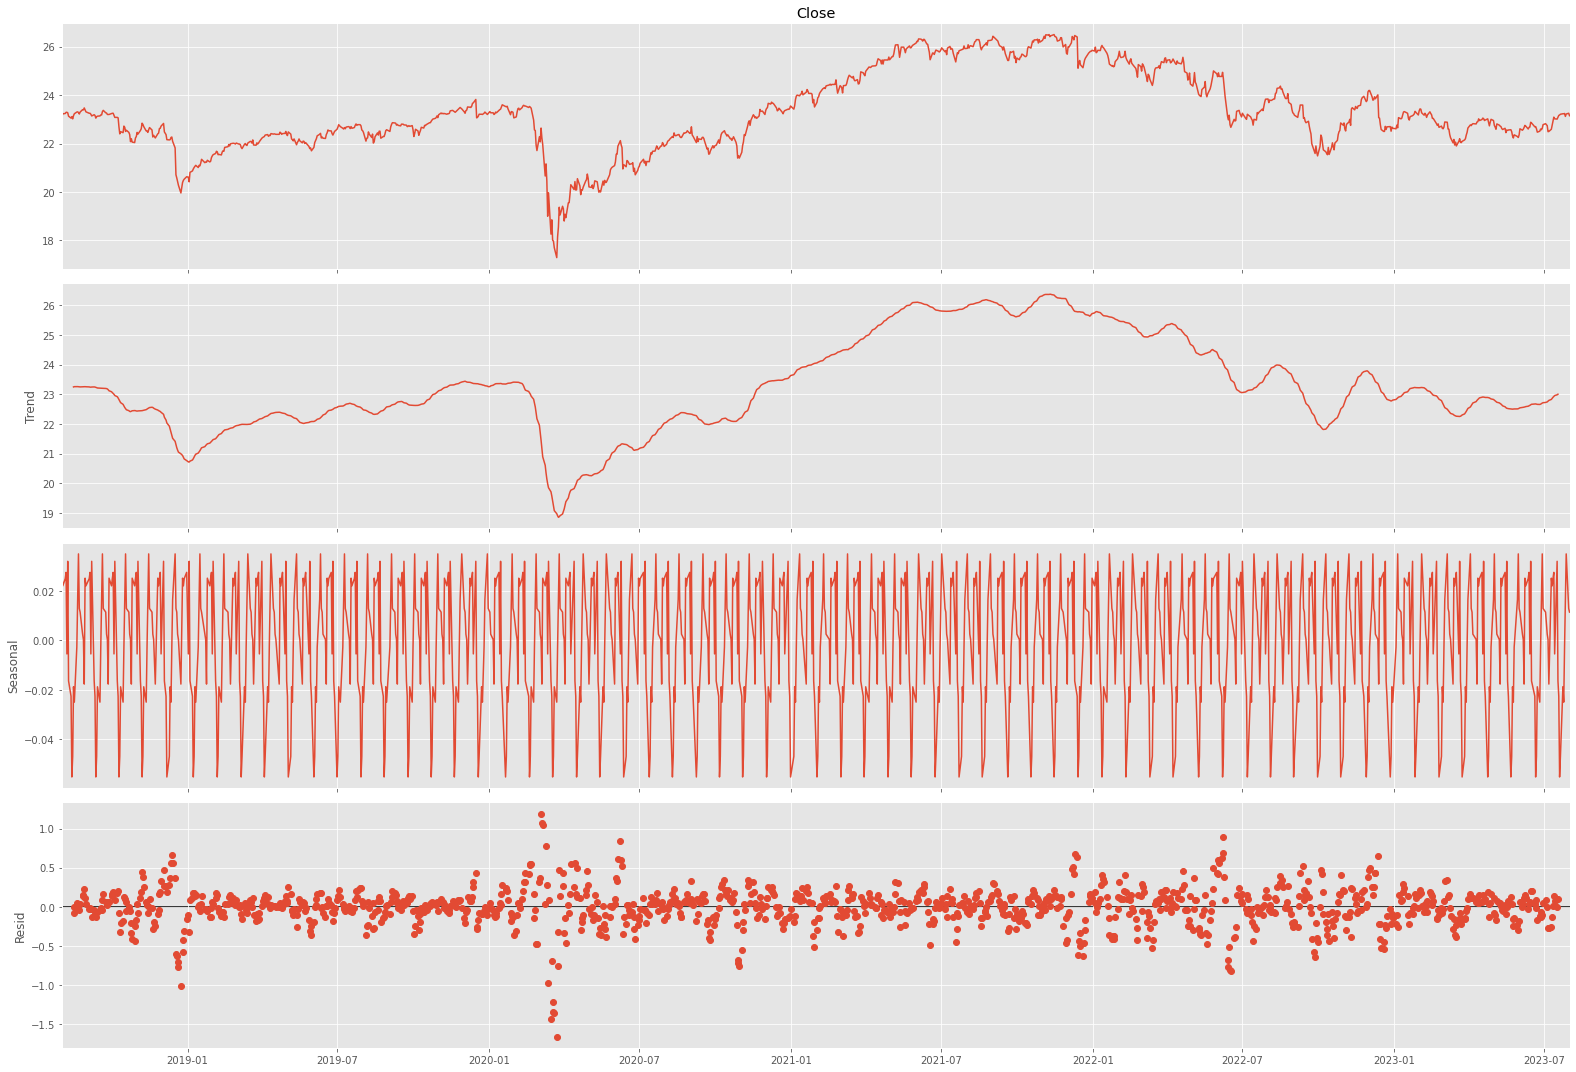

In [26]:
# Check the daily decomposition of my daily closing price time series
# Trend
# Seasonality
# Noise

from pylab import rcParams
rcParams['figure.figsize'] = 22, 15
decomp_daily = seasonal_decompose(close_ts, model='additive', period=20)
fig = decomp_daily.plot()

#Save the figure
plt.savefig("Decomposition Daily BTC.png", transparent = True, dpi=150)
plt.show()

<AxesSubplot:xlabel='Date'>

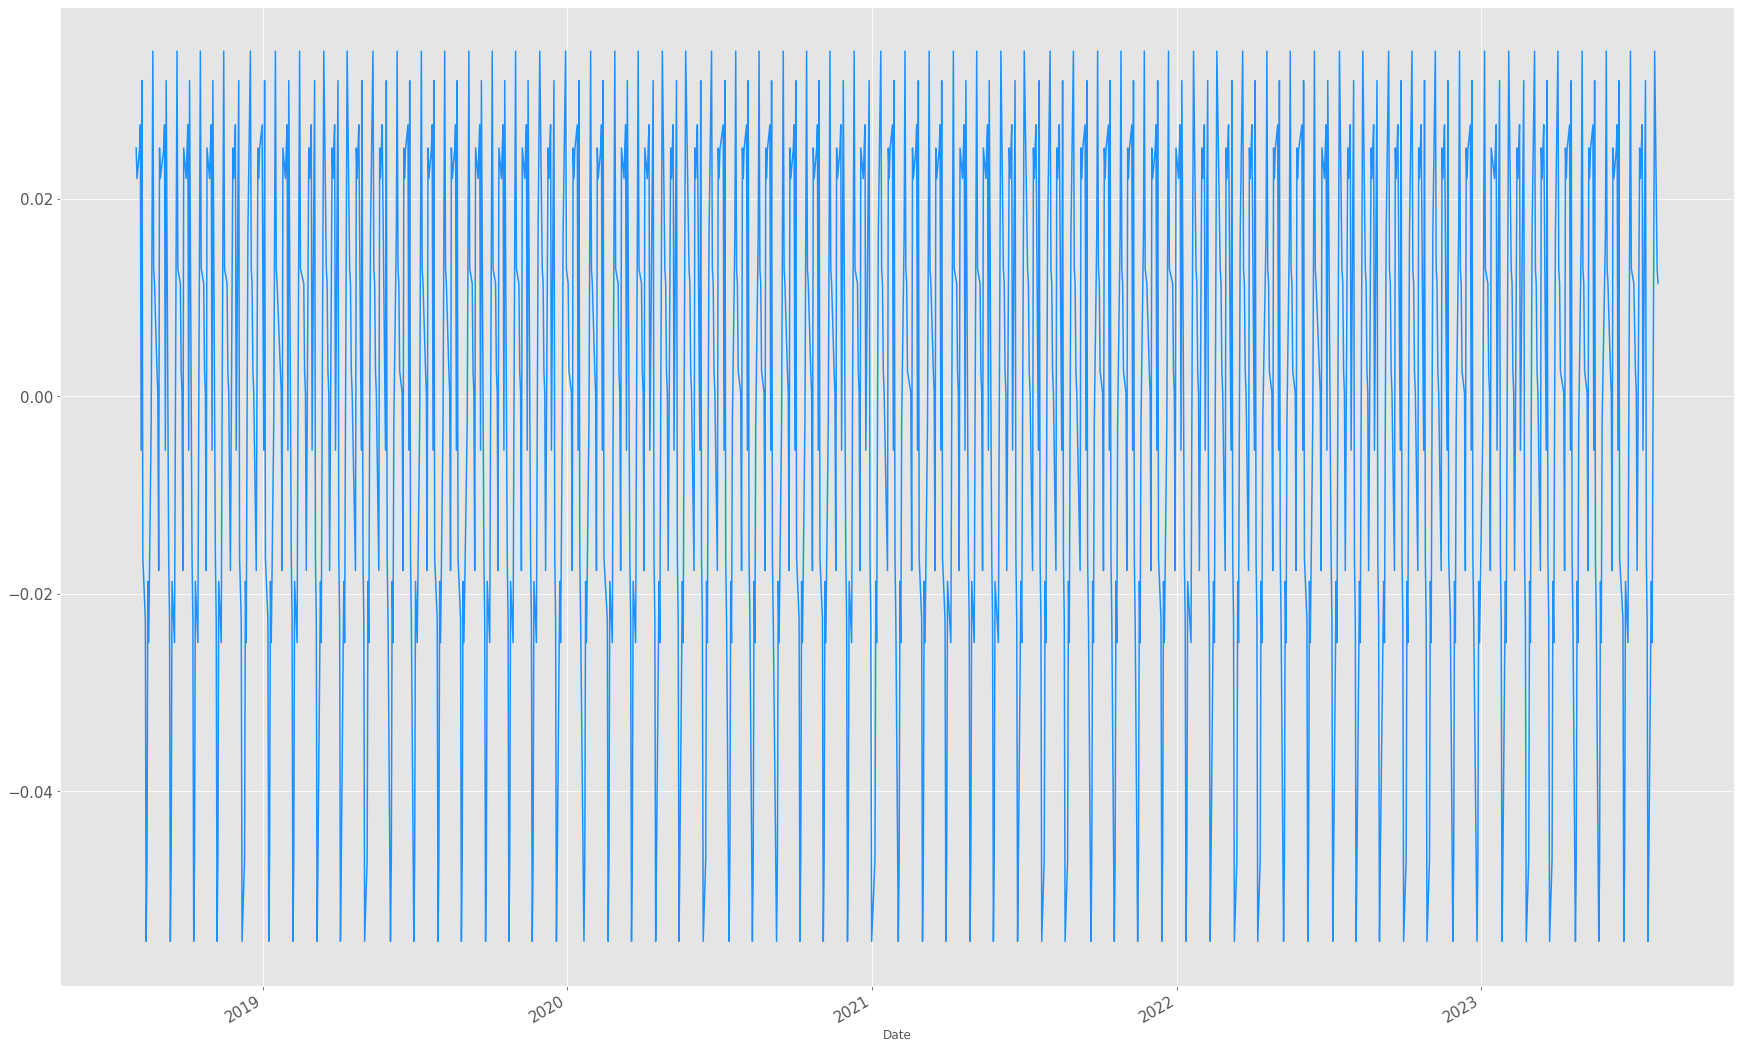

In [27]:
# I have extracted the seasonality from the time series

seasonality=decomp_daily.seasonal
seasonality.plot(fontsize= 15, color='dodgerblue', figsize=(30, 20))

### Make Close Price Stationary

In [28]:
# Create transformation, difference the data
close_diff = close_ts.diff().dropna()

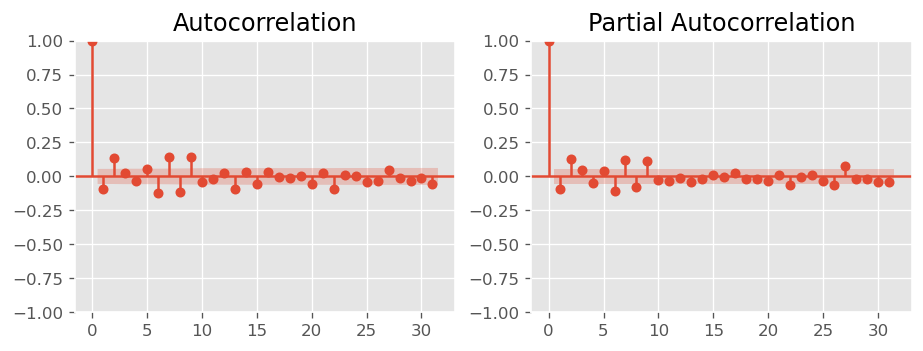

In [29]:
# Check ACF and PACF graphs to decide p and q parameters
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

# ACF, Decide for AR, p
plot_acf(close_diff, title='Autocorrelation', ax=axes[0]);

# PACF, Decide for MA term, q
plot_pacf(close_diff, title='Partial Autocorrelation', ax=axes[1]);

#Save the figure
#plt.savefig("ACF & PACF.png", transparent = True, dpi=150)

In [30]:
# Check p value of our close_ts and check if it is stationary
# 1. Test Statistic, 2. p-value, 3. #Lags Used, 4. Number of Observations Used, 5. Critical values
dftest = adfuller(close_diff.dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

if dftest[1] < 0.05:
    print("Differenced data is STATIONARY.")
else:
    print("Differenced data is \
NOT stationary.")

1. ADF         :  -10.530367759002353
2. P-Value     :  9.185210438678579e-19
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1247
5. Critical Values :
	 1% :  -3.4356048614183443
	 5% :  -2.8638605461891617
	 10% :  -2.5680054872544145
Differenced data is STATIONARY.


### 1st model

In [32]:
# Train Test split 
train_len = 800
train = df_cleaned[0:train_len] # first 2693 days as train set
test = df_cleaned[train_len:]   # 460 days as test set

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

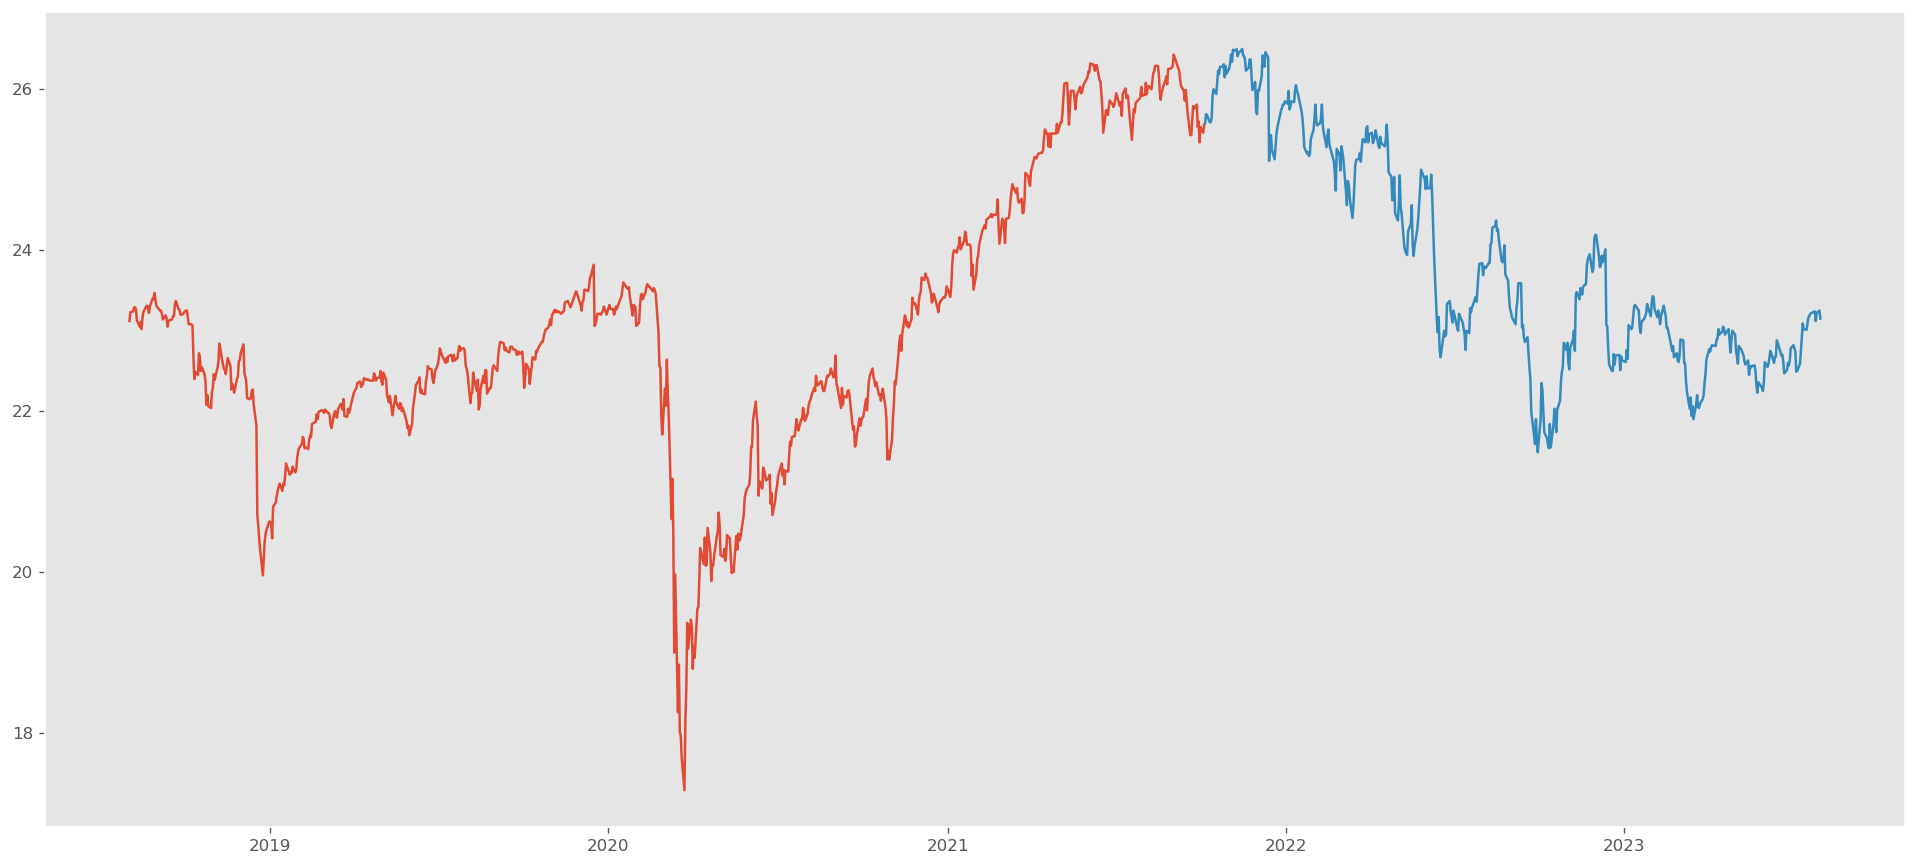

In [35]:
pred_naive = test.copy()
pred_naive['naive_forecast'] = train['Close'][train_len-1]

plt.figure(figsize=(20,9))
plt.grid()
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Test Data')
plt.plot(pred_naive.index, pred_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Model Forecast', fontsize=15)

# Labels
plt.ylabel('BTC Price- USD', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Sub labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12);
plt.show()

### 2nd Model

In [36]:
# Define train and test sets (~85 % train, ~15% test set)

train = close_ts.iloc[:-int(len(close_ts) * 0.146)]
test = close_ts.iloc[-int(len(close_ts) * 0.146):]

print('close_ts length   :', len(close_ts))
print('train data length :', len(train))
print('test data length  :', len(test))

close_ts length   : 1257
train data length : 1074
test data length  : 183


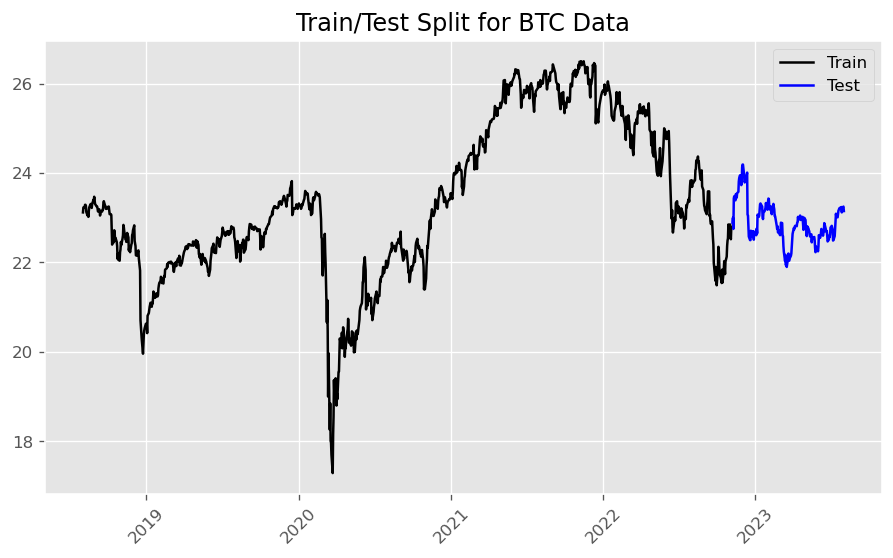

In [37]:
# Visualize the train test split as a graph

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(train, color = "black", label='Train')
ax.plot(test, color = "blue", label='Test')
ax.set_title("Train/Test Split for BTC Data")

# Rotate x-axis to read easier
plt.xticks(rotation=45)

#Save the figure
#plt.savefig("Train.png", transparent = True, dpi=150)

plt.legend();

In [38]:
# We will now set aside our test set to build our model on the train

split = TimeSeriesSplit()

In [39]:
# Check the train 1st differencing stationary
dftest = adfuller(train.diff().dropna(), autolag = 'AIC')

print("1. ADF         : ", dftest[0])
print("2. P-Value     : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
    
if dftest[1] < 0.05:
    print("Differenced train data is STATIONARY.")
else:
    print("Differenced train data is \
NOT stationary.")

1. ADF         :  -9.71742326075343
2. P-Value     :  9.745448011252722e-17
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1064
5. Critical Values :
	 1% :  -3.436510851955201
	 5% :  -2.864260220574562
	 10% :  -2.5682183458999943
Differenced train data is STATIONARY.


### Instatiating first

In [41]:
# Instantiate and fit the model
# I have to difference my data, because train is not stationary. This model will not perform well already.
# So I start d=1, no need to try d=0, because I know my train data is non-stationary.

ar_1 = ARIMA(train, order=(1, 1, 1)).fit()
ar_2 = ARIMA(train, order=(3, 1, 3)).fit()
ar_3 = ARIMA(train, order=(10, 1, 10)).fit()

In [47]:
# Prediction train
train_pred_1 = ar_1.predict()
train_pred_2 = ar_2.predict()
train_pred_3 = ar_3.predict()

# Root Mean Squared Error of train data
train_error_1 = np.sqrt(mean_squared_error(train, train_pred_1))
train_error_2 = np.sqrt(mean_squared_error(train, train_pred_2))
train_error_3 = np.sqrt(mean_squared_error(train, train_pred_3))

In [48]:
# Prediction test
pred_1 = ar_1.predict(start = test.index[0], end = test.index[-1])
pred_2 = ar_2.predict(start = test.index[0], end = test.index[-1])
pred_3 = ar_3.predict(start = test.index[0], end = test.index[-1])

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [49]:
print('RMSE - Train error 1 :', train_error_1)
print('RMSE - Train error 2 :', train_error_2)
print('RMSE - Train error 3 :', train_error_3)
print('AIC ar_1:', ar_1.aic)
print('AIC ar_2:', ar_2.aic)
print('AIC ar_3:', ar_3.aic)
print(ar_3.summary())

RMSE - Train error 1 : 0.7313716467210879
RMSE - Train error 2 : 0.7299646060948001
RMSE - Train error 3 : 0.7293343574276898
AIC ar_1: -479.6636089359572
AIC ar_2: -532.4578070517447
AIC ar_3: -532.5269900805949
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1074
Model:               ARIMA(10, 1, 10)   Log Likelihood                 287.263
Date:                Wed, 09 Aug 2023   AIC                           -532.527
Time:                        10:50:05   BIC                           -427.985
Sample:                             0   HQIC                          -492.930
                               - 1074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
#
#def test_stationarity(timeseries, window):
    
    #determining rolling statistics
    rolmean= timeseries.rolling(window=window).mean()
    rolstd= timeseries.rolling(window=window).std()
    
    #Plotting rolling statistics
    fig= plt.figure(figsize= 12,8)
    orig=plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rol Mean')
    std=plt.plot(rolmean, color='black', label='Rol Std')
    plt.legend (loc='best')
    plt.title ('Rolling Mean and Std')
    plt.show()
    
    #Perform Dickey Fuller Test. 
    print ('Result from Dickey-Fuller Testing')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#of lags used', '#of Observations used']
    for key, value in dftest[4].items():
                        dfoutput['Critical Value(%s)'%key]= value
    print (dfoutput)

In [ ]:
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Differenced Data', fontsize=14);

In [ ]:
### Cross validation Code

In [ ]:
#Resseting index 
train_with_ind= train.reset_index()

In [ ]:
train_with_ind

In [ ]:
for train_ind, val_ind in split.split(train_with_ind):
    ar= ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1,1,0)).fit()
    preds= ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true= train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true,preds)))

In [ ]:
#Rolling mean of residuals for the naive model
fig, ax = plt.subplots()
residuals = naive[1:] - train [1:]
ax.plot(residuals)
ax.plot (residuals.rolling(5).std());